<a href="https://colab.research.google.com/github/Olga-1911/backward-propagation/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B0%D0%B1_%D1%80%D0%B0%D0%B1__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Инициализация весов и смещений

In [1]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

Прямое распространение

In [2]:
def relu(z):
    return np.maximum(0, z)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

Обратное распространение ошибки

In [3]:
def relu_derivative(z):
    return (z > 0).astype(float)
def backward_propagation(X, Y, Z1, A1, A2, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

Обновим параметры нейронной сети

In [4]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

**Осуществляем разработку приложения для классификации рукописных чисел**

Загружаем данные и делим на тренировочные и тестовые.

In [6]:
from tensorflow.keras.datasets import mnist

In [8]:
import os
import numpy as np
from PIL import Image

from tensorflow.keras.datasets import mnist

def save_mnist_images(output_dir):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    os.makedirs(output_dir, exist_ok=True)

    train_dir = os.path.join(output_dir, 'train')
    os.makedirs(train_dir, exist_ok=True)

    for digit in range(10):
        digit_dir = os.path.join(train_dir, str(digit))
        os.makedirs(digit_dir, exist_ok=True)

        indices = np.where(y_train == digit)[0]
        for j, idx in enumerate(indices):
            img = Image.fromarray(x_train[idx])
            img.save(os.path.join(digit_dir, f"{j}.png"))

    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(test_dir, exist_ok=True)

    for digit in range(10):
        digit_dir = os.path.join(test_dir, str(digit))
        os.makedirs(digit_dir, exist_ok=True)

        indices = np.where(y_test == digit)[0]
        for j, idx in enumerate(indices):
            img = Image.fromarray(x_test[idx])
            img.save(os.path.join(digit_dir, f"{j}.png"))

if __name__ == "__main__":
    save_mnist_images("mnist_images")

Предобработка данных

In [9]:
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((num_classes, labels.shape[0]))
    one_hot[labels, np.arange(labels.shape[0])] = 1
    return one_hot

In [13]:
def load_mnist_from_directory(directory):
    images = []
    labels = []
    for label in range(10):
        label_dir = os.path.join(directory, str(label))
        for file_name in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file_name)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            images.append(img.flatten() / 255.0)
            labels.append(label)
    return np.array(images), np.array(labels)

In [15]:
import cv2

In [16]:
x_train, y_train = load_mnist_from_directory("/content/mnist_images/train")
x_test, y_test = load_mnist_from_directory("/content/mnist_images/test")

print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")

x_train: (60000, 784), y_train: (60000,)


In [19]:
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

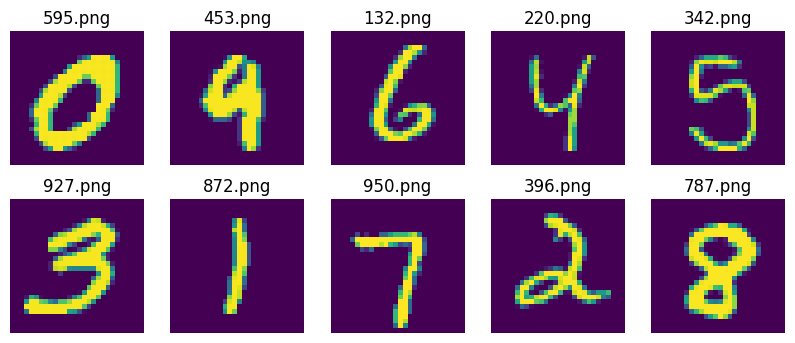

In [20]:
subfolders = [f.path for f in os.scandir('/content/mnist_images/test') if f.is_dir()]
selected_images = []

for folder in subfolders:
    images = [f for f in os.listdir(folder) if f.endswith(('jpg', 'jpeg', 'png', 'gif'))]
    if images:  # Если в папке есть изображения
        selected_image = random.choice(images)
        selected_images.append(os.path.join(folder, selected_image))

plt.figure(figsize=(10, 4))
for i, image_path in enumerate(selected_images[:10]):
    img = mpimg.imread(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
plt.show()

In [21]:
input_size = 784
hidden_size = 128
output_size = 10

x_train = x_train.T
x_test = x_test.T

y_train_one_hot = one_hot_encode(y_train, output_size)
y_test_one_hot = one_hot_encode(y_test, output_size)

Произведем обучение модели

In [22]:
def train(X, Y, input_size, hidden_size, output_size, learning_rate, num_iterations):
    list_loss = []
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = -np.mean(np.sum(Y * np.log(A2 + 1e-8), axis=0))
        list_loss.append(loss)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 100 == 0:
            print(f"Итерация {i}: ошибка = {loss}")
    return W1, b1, W2, b2, list_loss

In [23]:
iterations = 500
learning_rate = 0.01
W1, b1, W2, b2,list_a  = train(x_train, y_train_one_hot, input_size, hidden_size, output_size, learning_rate, iterations)

Итерация 0: ошибка = 2.302835447984188
Итерация 100: ошибка = 2.2904548476417688
Итерация 200: ошибка = 2.268236738941945
Итерация 300: ошибка = 2.221310406457631
Итерация 400: ошибка = 2.1265796803807855


Произведем тестирование модели

In [24]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

In [25]:
y_pred = predict(x_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred == y_test)
print(f"Точность на тестовых данных: {accuracy * 100:.2f}%")

Точность на тестовых данных: 65.63%


Проведем тестирование с другими параметрами

In [ ]:
iterations = 1000
learning_rate = 1.10
W1, b1, W2, b2,list_b  = train(x_train, y_train_one_hot, input_size, hidden_size, output_size, learning_rate, iterations)

Итерация 0: ошибка = 2.302835447984188
Итерация 100: ошибка = 0.316005253785306
Итерация 200: ошибка = 0.2112558879000756
Итерация 300: ошибка = 0.17830283818661063
Итерация 400: ошибка = 0.14660237335883425


In [ ]:
y_pred = predict(x_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred == y_test)
print(f"Точность на тестовых данных: {accuracy * 100:.2f}%")

In [ ]:
iterations = 1000
learning_rate = 0.8
W1, b1, W2, b2,list_c  = train(x_train, y_train_one_hot, input_size, hidden_size, output_size, learning_rate, iterations)

In [ ]:
y_pred = predict(x_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred == y_test)
print(f"Точность на тестовых данных: {accuracy * 100:.2f}%")

In [ ]:
iterations = 1000
learning_rate = 0.02
W1, b1, W2, b2,list_d  = train(x_train, y_train_one_hot, input_size, hidden_size, output_size, learning_rate, iterations)

In [ ]:
y_pred = predict(x_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred == y_test)
print(f"Точность на тестовых данных: {accuracy * 100:.2f}%")

In [ ]:
x_indices = list(range(len(list_a)))
plt.figure(figsize=(20, 6))
plt.plot(x_indices, list_a, label='learning_rate = 0.01')
plt.plot(x_indices, list_b, label='learning_rate = 1.1')
plt.plot(x_indices, list_c, label='learning_rate = 0.8')
plt.plot(x_indices, list_d, label='learning_rate = 0.02')
plt.title('loss')
plt.xlabel('iterations')
plt.ylabel('Значения')
plt.legend()
plt.grid()
plt.show()

Из графика мы можем увидеть, что наилучший вариант - модели со средними параметрами, здесь оптимальна скорость обучения и точность.